In [4]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd

# Load variable names and data
var_names_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

# Specify the columns you need
columns_to_load = [
    'WELLNESS_self_rated_mental_health', 
    'CONNECTION_social_time_friends_p7d', 
    'CONNECTION_social_time_family_p7d', 
    'CONNECTION_social_num_close_friends'
]

# Load the data with only the required columns
data = pd.read_csv(data_url, usecols=columns_to_load, na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

# Ensure the outcome variable is numeric
category_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(category_mapping)

# Continue with the rest of your code
formula = """
    WELLNESS_self_rated_mental_health ~ 
    C(pd.cut(CONNECTION_social_time_friends_p7d, 
             bins=[-1, 1, 168], 
             labels=["0-1", "more than 1 hour"]), 
      Treatment(reference="0-1")) + 
    C(pd.cut(CONNECTION_social_time_family_p7d, 
             bins=[-1, 0, 2, 168], 
             labels=["0", "1-2", "more than 2"]), 
      Treatment(reference="1-2")) + 
    C(pd.cut(CONNECTION_social_num_close_friends, 
             bins=[-1, 0, 1, 3, 6, 10, 150], 
             labels=["0", "1", "2-3", "4-6", "7-10", "over 10"]), 
      Treatment(reference="4-6"))
"""

# Fit the ordinal regression model
model = OrderedModel.from_formula(formula, data=data, distr='logit')
result = model.fit(method='bfgs')

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.234384
         Iterations: 51
         Function evaluations: 52
         Gradient evaluations: 52
                                     OrderedModel Results                                    
Dep. Variable:     WELLNESS_self_rated_mental_health   Log-Likelihood:                -4995.6
Model:                                  OrderedModel   AIC:                         1.001e+04
Method:                           Maximum Likelihood   BIC:                         1.008e+04
Date:                               Fri, 29 Nov 2024                                         
Time:                                       01:03:33                                         
No. Observations:                               4047                                         
Df Residuals:                                   4036                                         
Df Model:                                          8                        

/tmp/ipykernel_53/3894612072.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Blues_d')
/tmp/ipykernel_53/3894612072.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Blues_d')


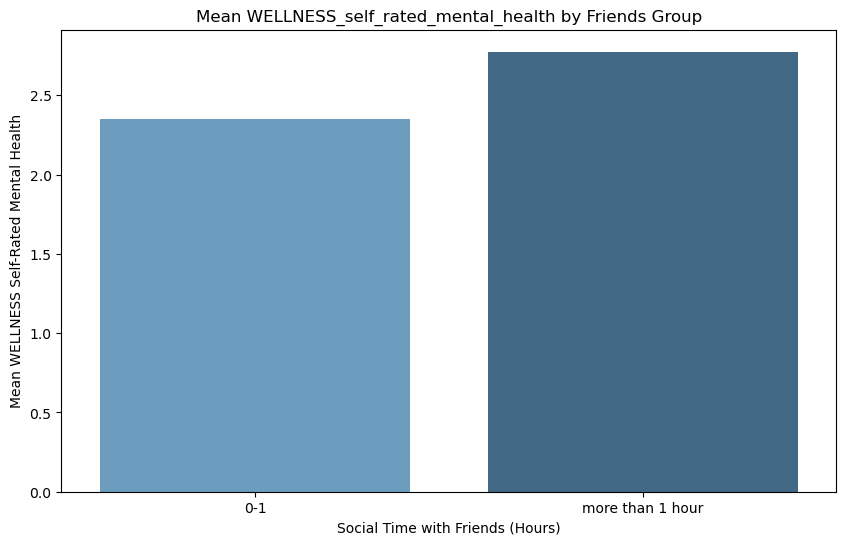

/tmp/ipykernel_53/3894612072.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Greens_d')
/tmp/ipykernel_53/3894612072.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Greens_d')


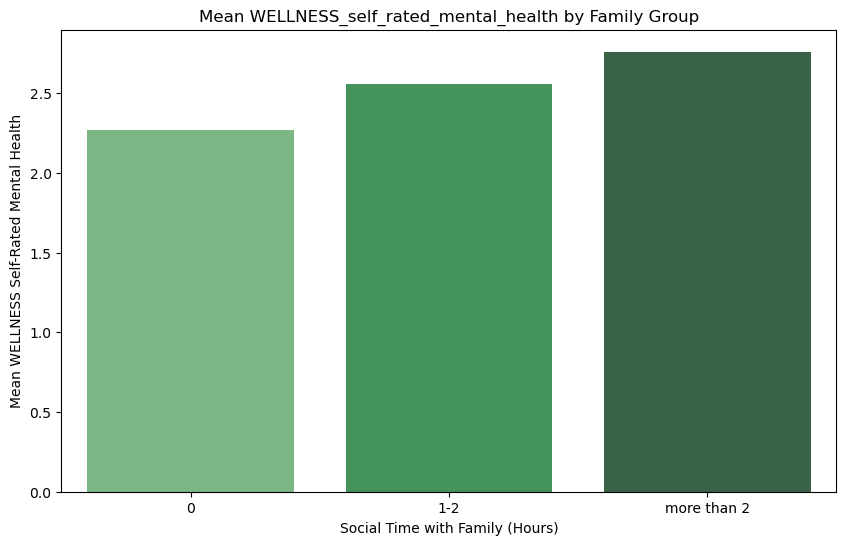

/tmp/ipykernel_53/3894612072.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='close_friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Purples_d')
/tmp/ipykernel_53/3894612072.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='close_friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Purples_d')


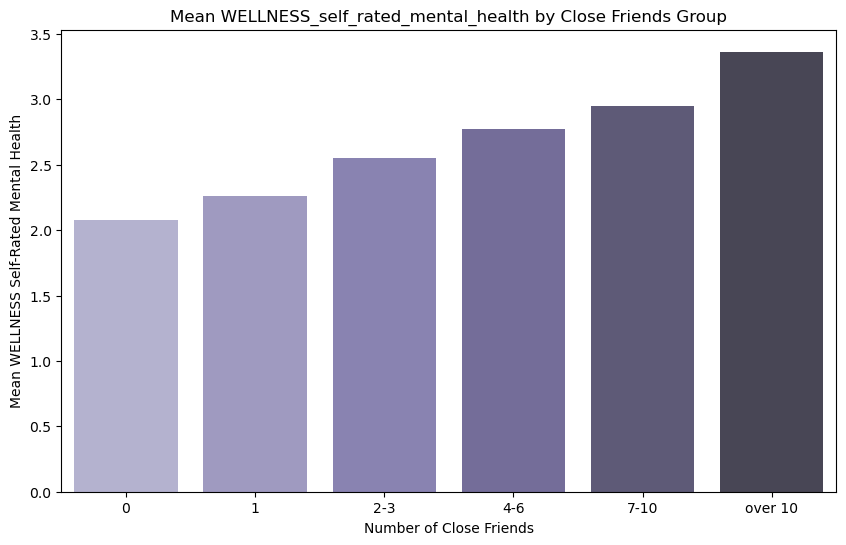

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map categorical variables to proper labels for plotting
data['friends_group'] = pd.cut(data['CONNECTION_social_time_friends_p7d'], 
                                bins=[-1, 1, 168], 
                                labels=["0-1", "more than 1 hour"])

data['family_group'] = pd.cut(data['CONNECTION_social_time_family_p7d'], 
                               bins=[-1, 0, 2, 168], 
                               labels=["0", "1-2", "more than 2"])

data['close_friends_group'] = pd.cut(data['CONNECTION_social_num_close_friends'], 
                                      bins=[-1, 0, 1, 3, 6, 10, 150], 
                                      labels=["0", "1", "2-3", "4-6", "7-10", "over 10"])

# Plot mean of WELLNESS_self_rated_mental_health by friends group
plt.figure(figsize=(10, 6))
sns.barplot(x='friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Blues_d')
plt.title('Mean WELLNESS_self_rated_mental_health by Friends Group')
plt.xlabel('Social Time with Friends (Hours)')
plt.ylabel('Mean WELLNESS Self-Rated Mental Health')
plt.show()

# Plot mean of WELLNESS_self_rated_mental_health by family group
plt.figure(figsize=(10, 6))
sns.barplot(x='family_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Greens_d')
plt.title('Mean WELLNESS_self_rated_mental_health by Family Group')
plt.xlabel('Social Time with Family (Hours)')
plt.ylabel('Mean WELLNESS Self-Rated Mental Health')
plt.show()

# Plot mean of WELLNESS_self_rated_mental_health by close friends group
plt.figure(figsize=(10, 6))
sns.barplot(x='close_friends_group', y='WELLNESS_self_rated_mental_health', data=data, ci=None, palette='Purples_d')
plt.title('Mean WELLNESS_self_rated_mental_health by Close Friends Group')
plt.xlabel('Number of Close Friends')
plt.ylabel('Mean WELLNESS Self-Rated Mental Health')
plt.show()